# Master Routine tester
---

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from time import time

from wifi_matrix import basic_lu
from find_optimal import find_optimal_2
from gaussianGrid import gauss_grid

In [4]:
%time lu, img = basic_lu("testrom5.png", higher_order= True)

Generating new A. 
Wall time: 2min 57s


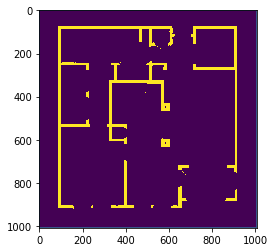

In [5]:
plt.imshow(np.abs(img))

In [6]:
x_c, y_c, scores_c, max_arg_c = find_optimal_2(lu, img, 20, True) # with convolution

Got positions
Getting solutions took 260.44s
212
(11, 14)
568 673


In [7]:
x, y, scores, max_arg = find_optimal_2(lu, img, 20, False) # without convolution

Got positions
Getting solutions took 140.10s
212
(11, 14)
568 673


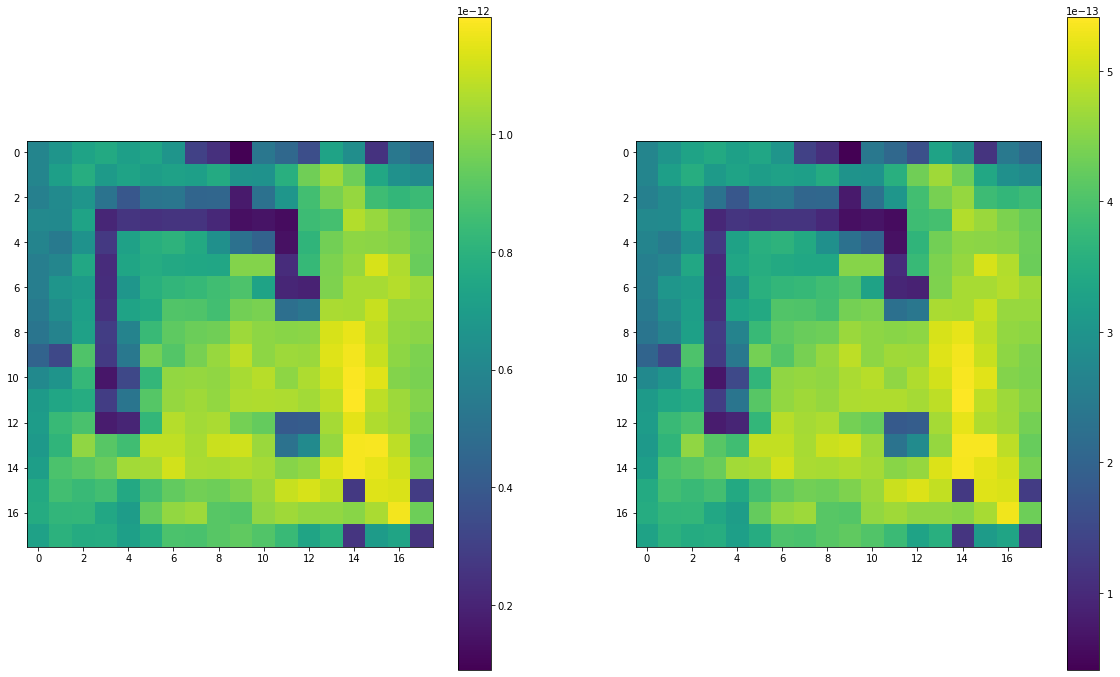

In [8]:
plt.figure(figsize=(20,12))
plt.subplot(121)
plt.imshow(scores)
plt.colorbar()
plt.subplot(122)
plt.imshow(scores_c)
plt.colorbar()

## Check if these points make sense
---

In [9]:
from wifi_matrix import solve_single_system
from find_optimal import convolve_solution
from score import step_score

In [10]:
sol = solve_single_system(lu, x, y, img.shape)

In [11]:
conv_sol = convolve_solution(sol, img.shape)

In [12]:
sc = step_score(sol,img)
sc_conv = step_score(conv_sol,img)

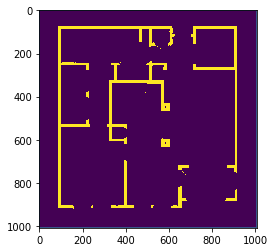

In [13]:
plt.imshow(np.abs(img))

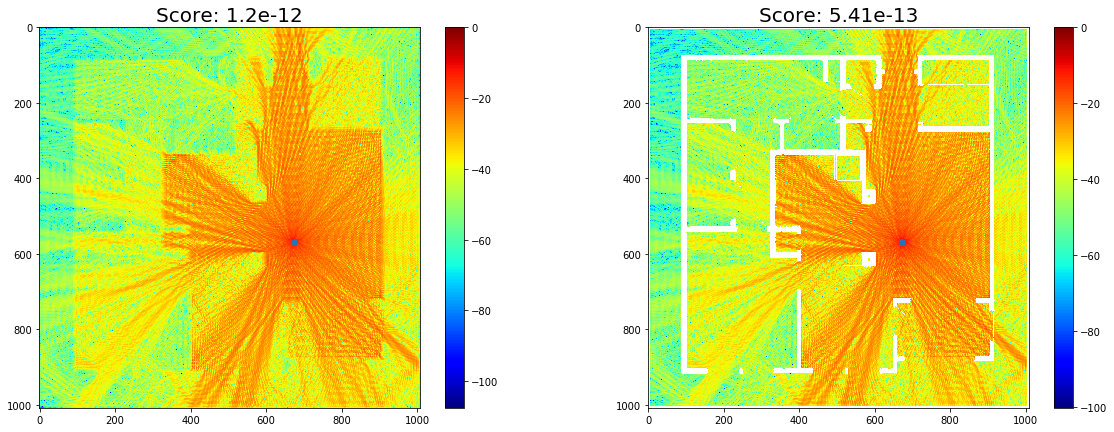

In [25]:
plt.figure(figsize=(20,7))

plt.subplot(121)
plt.imshow(10*np.log10(np.abs(sol.reshape(img.shape))**2 /(np.max(np.abs(sol)**2))), cmap='jet')
plt.title(f"Score: {sc:.3}", size = 20)
plt.colorbar()
plt.scatter(y,x)
plt.subplot(122)
plt.imshow(np.ma.array(10*np.log10(np.abs(conv_sol.reshape(img.shape))**2 /(np.max(np.abs(conv_sol)**2))),mask = (img !=1.0)), cmap='jet')
plt.colorbar()
plt.title(f"Score: {sc_conv:.3}", size = 20)
plt.scatter(y,x)

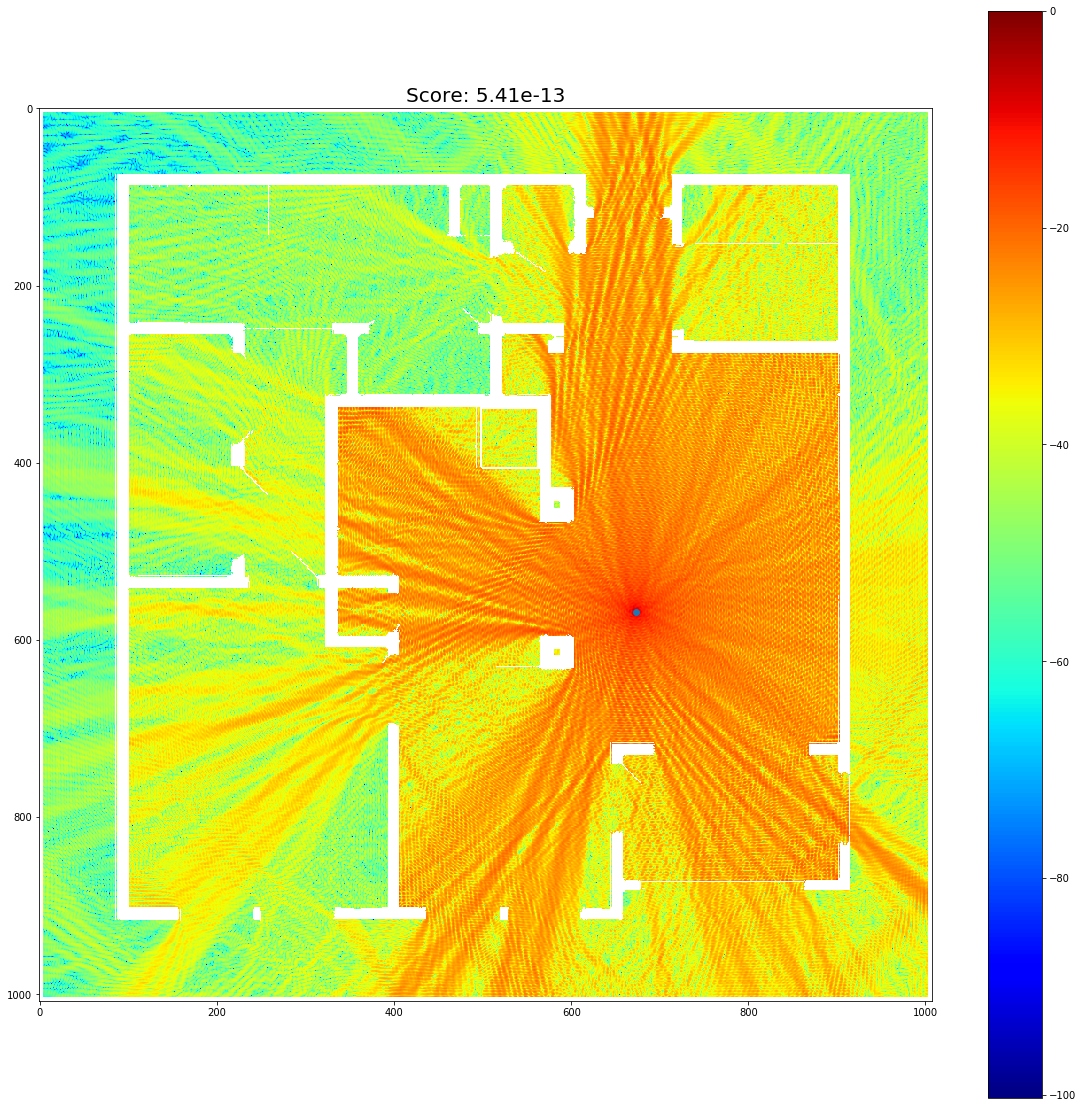

In [27]:
plt.figure(figsize= (20,20))
plt.imshow(np.ma.array(10*np.log10(np.abs(conv_sol.reshape(img.shape))**2 /(np.max(np.abs(conv_sol)**2))),mask = (img !=1.0)), cmap='jet')
plt.colorbar()
plt.title(f"Score: {sc_conv:.3}", size = 20)
plt.scatter(y,x)

## Compare to placement in the middle of the apartment
---

In [15]:
x0, y0 = img.shape
x0 = x0 //2
y0 = y0 //2
x0, y0

(504, 504)

In [16]:
sol0 = solve_single_system(lu, x0, y0, img.shape)
conv_sol0 = convolve_solution(sol0, img.shape)

In [17]:
sc0 = step_score(sol0,img)
sc_conv0 = step_score(conv_sol0,img)

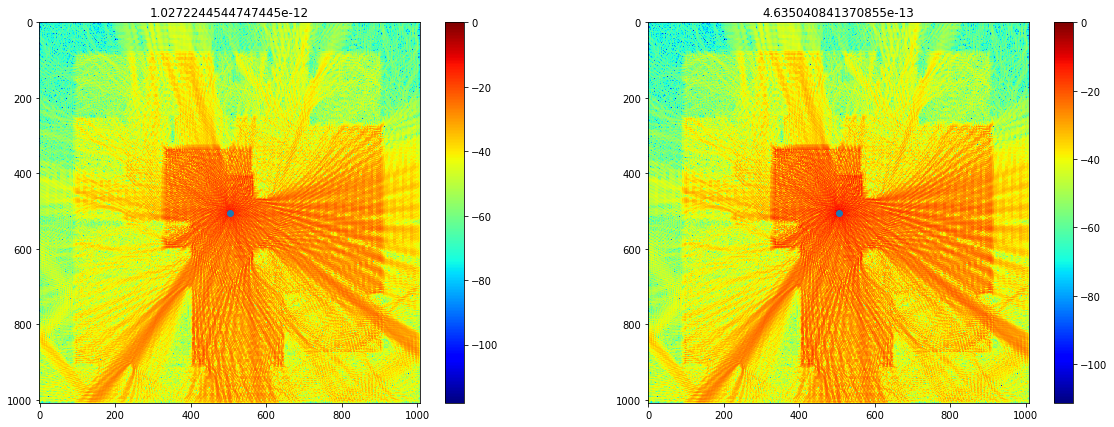

In [18]:
plt.figure(figsize=(20,7))

plt.subplot(121)
plt.imshow(10*np.log10(np.abs(sol0.reshape(img.shape))**2 /(np.max(np.abs(sol0)**2))), cmap='jet')
plt.title(f"{sc0}")
plt.colorbar()
plt.scatter(y0,x0)
plt.subplot(122)
plt.imshow(10*np.log10(np.abs(conv_sol0.reshape(img.shape))**2 /(np.max(np.abs(conv_sol0)**2))), cmap='jet')
plt.colorbar()
plt.title(f"{sc_conv0}")
plt.scatter(y0,x0)

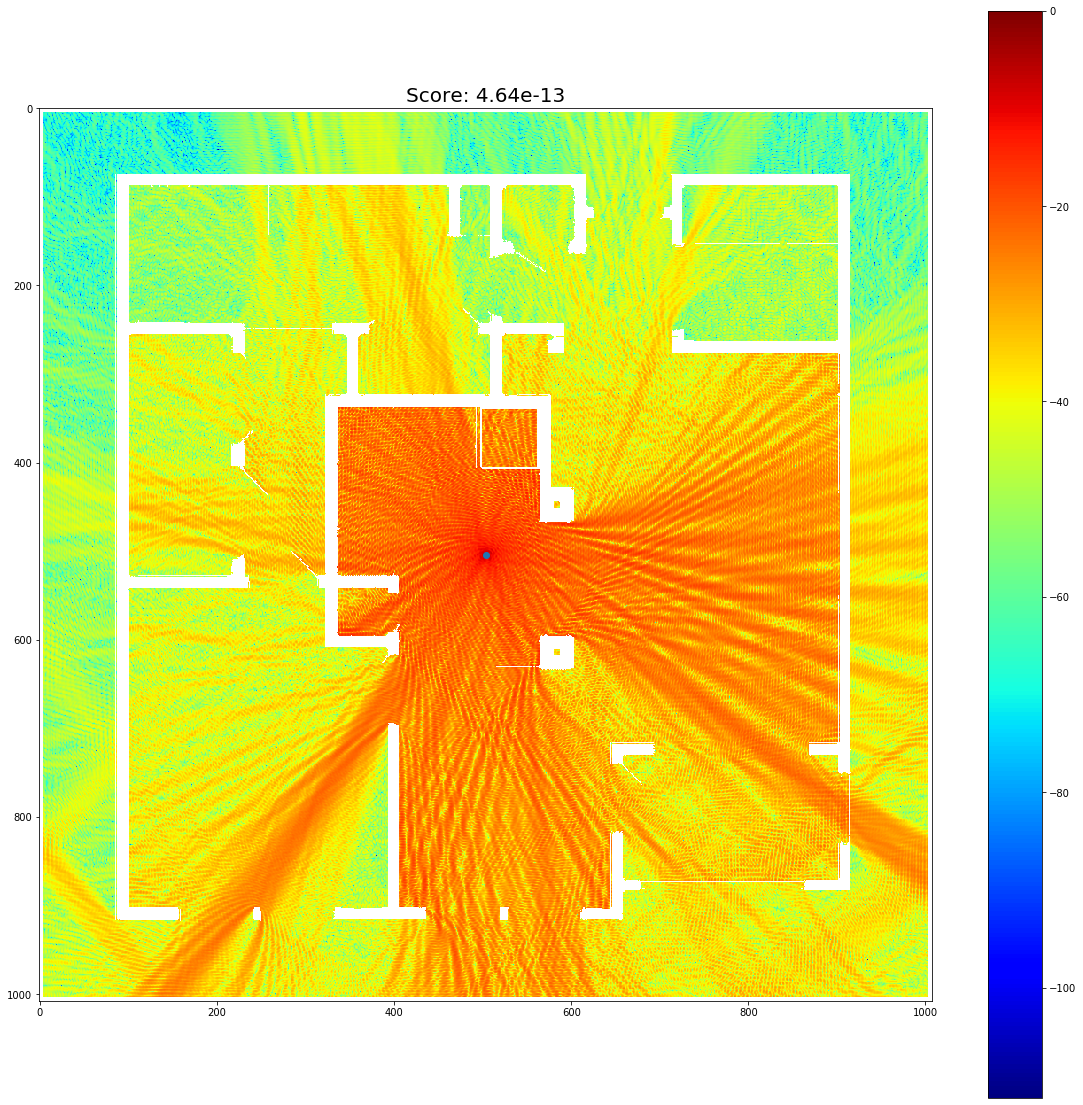

In [28]:
plt.figure(figsize= (20,20))
plt.imshow(np.ma.array(10*np.log10(np.abs(conv_sol0.reshape(img.shape))**2 /(np.max(np.abs(conv_sol0)**2))), mask =(img != 1.)), cmap='jet')
plt.colorbar()
plt.title(f"Score: {sc_conv0:.3}", size = 20)
plt.scatter(y0,x0)

## Check opposite side
---

In [30]:
x1, y1 = img.shape
x1 = x1 //2
y1 = y1 //2
diffx = x1-x
diffy = y1-y
x1 = x1 + diffx
y1 = y1+diffy
x1, y1

(440, 335)

In [31]:
sol1 = solve_single_system(lu, x1, y1, img.shape)
conv_sol1 = convolve_solution(sol1, img.shape)
sc1 = step_score(sol1,img)
sc_conv1 = step_score(conv_sol1,img)

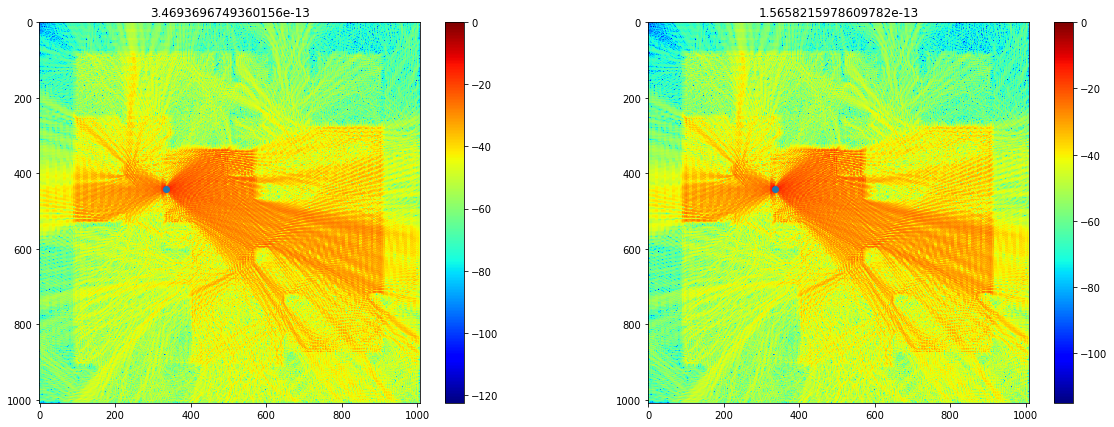

In [32]:
plt.figure(figsize=(20,7))

plt.subplot(121)
plt.imshow(10*np.log10(np.abs(sol1.reshape(img.shape))**2 /(np.max(np.abs(sol1)**2))), cmap='jet')
plt.title(f"{sc1}")
plt.colorbar()
plt.scatter(y1,x1)
plt.subplot(122)
plt.imshow(10*np.log10(np.abs(conv_sol1.reshape(img.shape))**2 /(np.max(np.abs(conv_sol1)**2))), cmap='jet')
plt.colorbar()
plt.title(f"{sc_conv1}")
plt.scatter(y1,x1)

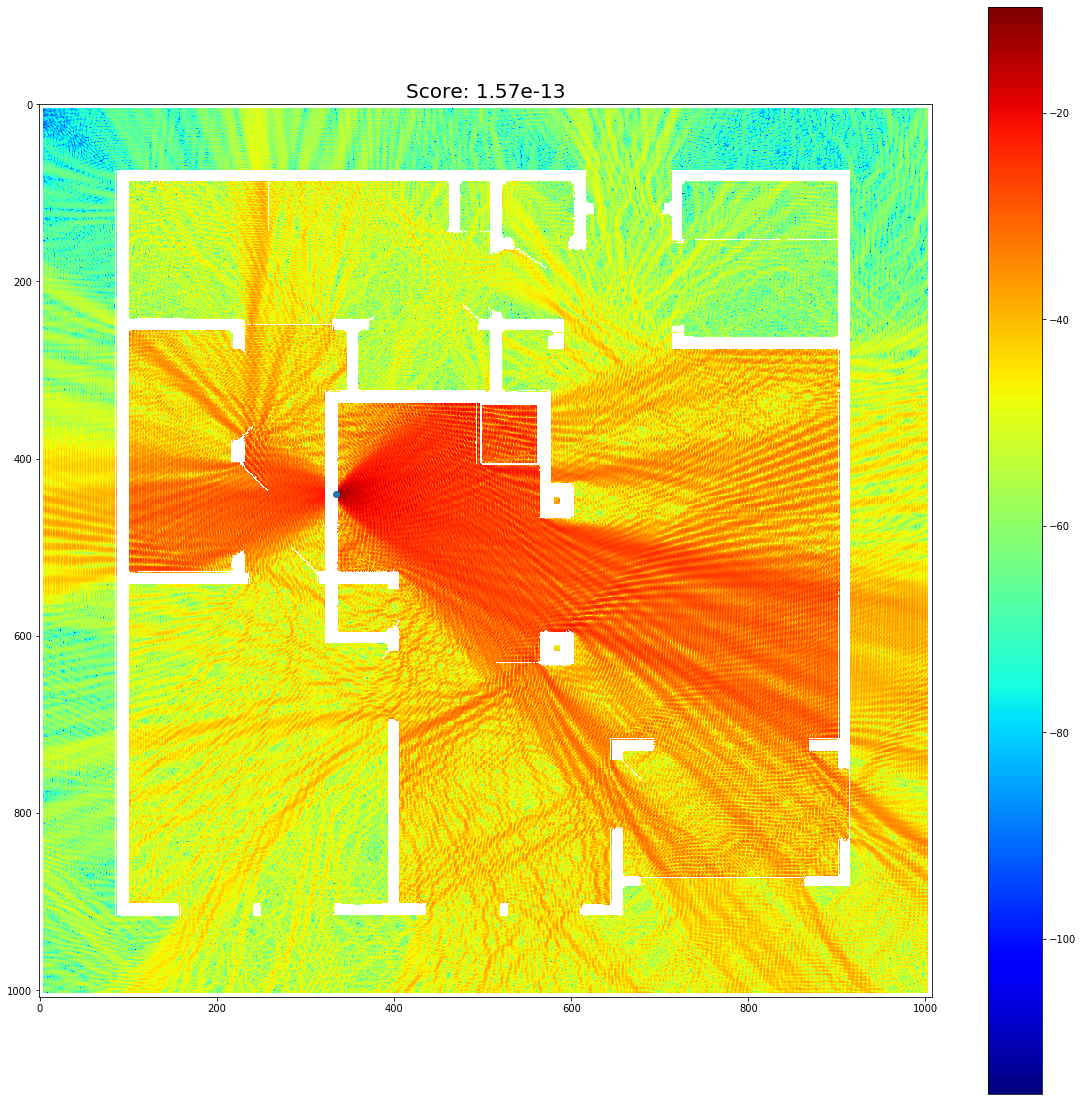

In [34]:
plt.figure(figsize= (20,20))
plt.imshow(np.ma.array(10*np.log10(np.abs(conv_sol1.reshape(img.shape))**2 /(np.max(np.abs(conv_sol1)**2))), mask =(img != 1.)), cmap='jet')
plt.colorbar()
plt.title(f"Score: {sc_conv1:.3}", size = 20)
plt.scatter(y1,x1)